<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#class_weight-=-'balanced'" data-toc-modified-id="class_weight-=-'balanced'-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>class_weight = 'balanced'</a></span></li><li><span><a href="#Upsample" data-toc-modified-id="Upsample-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Upsample</a></span></li><li><span><a href="#Downsample" data-toc-modified-id="Downsample-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Downsample</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Прогнозирование оттока клиентов банка

Из банка понемногу, но каждый месяц и заметно уходять клиенты. Банковские маркетологи посчитали, что сохранять текущих клиентов дешевле, чем привлекать новых.

Необходимо спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.   
Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Нужно построить модель с предельно большим значением *F1*-меры.   
Нужно довести метрику F1 выше 0.59 и дополнительно измерить *AUC-ROC*

**Опиание данных:**

**Признаки**  
`RowNumber` — индекс строки в данных  
`CustomerId` — уникальный идентификатор клиента  
`Surname` — фамилия  
`CreditScore` — кредитный рейтинг  
`Geography` — страна проживания  
`Gender` — пол  
`Age` — возраст  
`Tenure` — сколько лет человек является клиентом банка  
`Balance` — баланс на счёте    
`NumOfProducts` — количество продуктов банка, используемых клиентом  
`HasCrCard` — наличие кредитной карты    
`IsActiveMember` — активность клиента  
`EstimatedSalary` — предполагаемая зарплата  

**Целевой признак**  
`Exited` — факт ухода клиента

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
import warnings
warnings.simplefilter('ignore')

In [2]:
try:
    data = pd.read_csv('Churn.csv')
except:
    data = pd.read_csv('https://df_address_is_here/Churn.csv') 

Поссмотрим данные. Выведем:

- 10 первых значений;  
- Общую информацию;  
- Описательную статистику.

In [3]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Наблюдения 
- обнаружены пропуски в признаке `Tenure`. Пропусков меньше 10%. Учитывая небольшие потери объетов при их удалении, целесообразно их просто убрать.
- порядка четверти значений признака `Balance` равна нулю, что возможно, если объекты  клиентами стали недавно или наоборот перестали пользоваться продуктами банка;
- выбивающийся показатель признака `EstimatedSalary` в 11.58 условных валютных единиц, что в 9 раз меньше среднего значения. Это, конечно же , возможно, но выглядит подозрительно. Ели он один, значения не придаём.
- признаки `RowNumber`, `CustomerId`, `Surname` не несут смыловой нагрузки для прогназируемой модели, удалим , чтобы не перегружать модель. С этой же целью проверим с помощью heatmap и  корреляцию осталных признаков. При обнаружении сильной корреляции удалим идин из них
- из статистических данных заметно, что целевой признак распределен неравномерно.

Займёмся пропусками.

In [6]:
print('Количество пропусков в признаке Tenure =', data['Tenure'].isna().sum(),'или', data['Tenure'].isna().sum()/len(data)*100,'%')

Количество пропусков в признаке Tenure = 909 или 9.09 %


Меньше 10%, так что без зазрения совести удаляем.

In [7]:
data.dropna(inplace = True)
print('Количество пропусков в столбце Tenure =', data['Tenure'].isna().sum())
print('Текущий размер датасета',data.shape)

Количество пропусков в столбце Tenure = 0
Текущий размер датасета (9091, 14)


С пропусками разобрались, посмотрим на подозрительные моменты.
Много нулей в `Balance`.   
Проверим гипотезу, что либо это новые клиенты, либо уже не активные и собрались в другие банки.

In [8]:
data.query('Balance == 0').head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.0,1,1,1,101348.88,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.0,2,0,0,93826.63,0
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.0,2,1,1,10062.80,0
11,12,15737173,Andrews,497,Spain,Male,24,3.0,0.0,2,1,0,76390.01,0
12,13,15632264,Kay,476,France,Female,34,10.0,0.0,2,1,0,26260.98,0
13,14,15691483,Chin,549,France,Female,25,5.0,0.0,2,0,0,190857.79,0
14,15,15600882,Scott,635,Spain,Female,35,7.0,0.0,2,1,1,65951.65,0
17,18,15788218,Henderson,549,Spain,Female,24,9.0,0.0,2,1,1,14406.41,0
18,19,15661507,Muldrow,587,Spain,Male,45,6.0,0.0,1,0,0,158684.81,0
19,20,15568982,Hao,726,France,Female,24,6.0,0.0,2,1,1,54724.03,0


In [9]:
data.query('Balance == 0')['Tenure'].value_counts()

2.0     349
7.0     343
5.0     341
6.0     331
8.0     330
4.0     329
1.0     329
3.0     322
9.0     319
10.0    162
0.0     128
Name: Tenure, dtype: int64

In [10]:
data.query('Balance == 0')['IsActiveMember'].value_counts()

1    1691
0    1592
Name: IsActiveMember, dtype: int64

Гипотеза не подтвердилась: у клиентов с нулевым балансом количество лет работы с банком  разнообразное и классификация активности клиентов распределилась поровну. Значит объяснение нулевого баланса лежит глубже первых логических предположений.   
Оставляем как есть, моделям нули не мешают, и они сумеют сами отработать такие значения.  

Проверим низкие зарплаты.

In [11]:
data.query('EstimatedSalary == 11.58')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2362,2363,15791053,Lucciano,709,Germany,Male,45,4.0,122917.71,1,1,1,11.58,1


Случай такой один, значения не придаём. Всякое случается!

Проверим, есть ли корреляция  признаков, чтобы убрать сильно кррелирующие и не перегружать модели

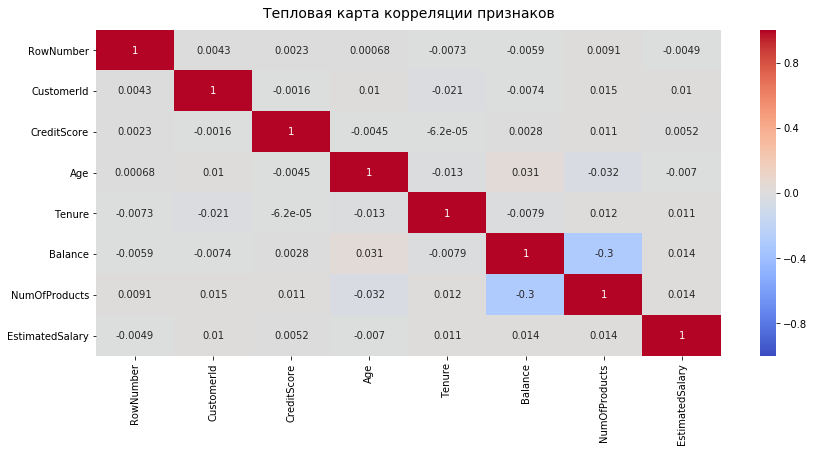

In [12]:
plt.figure(figsize=(14, 6))
heatmap = sns.heatmap(data[['RowNumber', 'CustomerId','CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']].corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Тепловая карта корреляции признаков', fontdict={'fontsize':14}, pad=12);

Корреляция всех признаков незначительная, поэтому сохраняем признаки, кроме неважных для моделей 3х:   `RowNumber`, `CustomerId`, `Surname` 

In [13]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 11 columns):
CreditScore        9091 non-null int64
Geography          9091 non-null object
Gender             9091 non-null object
Age                9091 non-null int64
Tenure             9091 non-null float64
Balance            9091 non-null float64
NumOfProducts      9091 non-null int64
HasCrCard          9091 non-null int64
IsActiveMember     9091 non-null int64
EstimatedSalary    9091 non-null float64
Exited             9091 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 852.3+ KB


Преобразуем категориальные признаки `Geography` и `Gender` в численные через прямое кодирование **`OHE`**, при этом уходя от дамми-ловушки, используя параметр `drop_first`. 

In [14]:
data_ohe = pd.get_dummies(data, drop_first=True) 
data_ohe.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0


Данные подготовили.

### Вывод ###

Данные представляют собой массив из 10000 клиентов, характеризуемых 14тю признаками, описывающих их состояние и поведение.   
3 признака `RowNumber`,	`CustomerId`,	`Surname` не являются значимыми для прогнозируемых модели, поэтому их удалили.   
В признаке `Tenure` имеется порядка 9.1% пропусков. Решено было удалить объекты с пропусками, чтобы не влиять на результаты метрик искусственным заполнением.   
Проверили корреляцию признаков, она оказалась маленькой и незначительной.  
Выявили подозрительные аномальные значения, которые не носят системный характер, поэтому оставили без изменений.  
Так же заметили дисбаланс классов целевого признака, который в перспективе будем обрабатывать для корректной работы моделей.  
Заменили категориальные признаки численными для дальнейшей работы с моделями.


## Исследование задачи

Отделяем целевой признак от фичей.  
Делим на обучающую, валидационную и тестовую выборки в пропорции 60:20:20. 

In [15]:
target = data_ohe['Exited']
features = data_ohe.drop(['Exited'] , axis=1)
 
features_train, features_val_test, target_train, target_val_test = train_test_split(features,target, stratify=target, test_size=0.4, random_state=12345)
features_test, features_valid, target_test, target_valid = train_test_split(features_val_test, target_val_test, test_size=0.5, random_state=12345)

Проверим соотношение разбивки.

In [16]:
def percent_ratio(df, title):
    percent_ratio = np.around(df.shape[0] / features.shape[0] * 100)
    print('Процентое соотношение', title, 'от исходных данных:', percent_ratio, '%')

In [17]:
percent_ratio(features_train,'features_train')
percent_ratio(features_valid,'features_valid')
percent_ratio(features_test,'features_test')

Процентое соотношение features_train от исходных данных: 60.0 %
Процентое соотношение features_valid от исходных данных: 20.0 %
Процентое соотношение features_test от исходных данных: 20.0 %


Масштабируем признаки с помощью стандартизации данных, чтобы модели  равнозначно учитывали все признаки.

In [18]:
numeric=['CreditScore','Age','Tenure','Balance','NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric]= scaler.transform(features_valid[numeric]) 
features_test[numeric]= scaler.transform(features_test[numeric]) 
features_train.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9723,-1.292898,-0.660843,0.686341,0.786636,-0.910943,0,0,-0.223548,0,0,1
1224,-1.563714,0.778434,1.034232,0.833795,-0.910943,1,0,1.383021,0,1,0
8377,1.581914,0.106771,-0.357331,-1.222967,0.789359,1,1,-0.308331,0,1,1
8014,0.842379,0.010820,-1.053112,0.807063,-0.910943,1,1,-0.430980,0,1,0
2491,-0.397123,-1.236554,-0.357331,-1.222967,0.789359,1,1,1.392642,0,1,0


Дисбаланс целевого признака выявили еще на подготовке, а теперь его визуализируем для обучающей выборки.

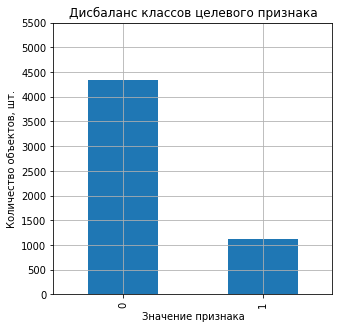

In [19]:
target_train.value_counts().plot(kind='bar',grid=True,figsize=(5,5),
                           title='Дисбаланс классов целевого признака')
plt.xlabel("Значение признака", fontsize=10)
plt.yticks(np.arange(0, 6000, 500), fontsize= 10 )
plt.ylabel("Количество объектов, шт.", fontsize=10)
plt.show()

Разница почти в 4 раза.
Компенсировать в третьей главе проекта будем 3мя вариантами:
    - при объявлении всех моделей добавим параметр class_weight = 'balanced'
    - используя функцию Upsampling, увеличим в обучающей выборке количество клиентов оттока (target==1)  
    - используя функцию Downsampling, уменьшим  в обучающей выборке количество клиентов оттока (target==0)  
    
**Посмотрим пока на модели без учёта дисбаланса**  
Чтобы сдать проект успешно, нужно довести метрику F1 до значения 0.59


### Дерево решений ###

Подберём гиперпараметр max_depth с наилучшим значением F1 у модели.

In [20]:
train_tree = []
valid_tree = [] 
best_model_tree = None
best_result_tree = 0 #0.59 не достигает
best_depth = 0
for depth in range(1, 21, 1):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features_train, target_train)
    
    predict_train_tree = model_tree.predict(features_train)
    f1_train_tree = f1_score(target_train, predict_train_tree) 
    train_tree.append(f1_train_tree.round(4))

    predicted_valid = model_tree.predict(features_valid)
    f1_valid_tree = f1_score(target_valid, predicted_valid) 
    valid_tree.append(f1_valid_tree.round(4))
    
    if f1_valid_tree > best_result_tree:
        best_model_tree = model_tree
        best_result_tree = f1_valid_tree
        best_depth = depth
          
print("F1 наилучшей модели на валидационной выборке:", best_result_tree.round(4))
print("Максимальная глубина дерева:", best_depth)

f1_tree = pd.DataFrame([train_tree,valid_tree], columns = range(1,21)).T.reset_index() 
f1_tree.columns = ['max_depth','f1_train','f1_valid']
f1_tree[['max_depth', 'f1_valid']]. head(10)

F1 наилучшей модели на валидационной выборке: 0.5394
Максимальная глубина дерева: 5


,max_depth,f1_valid
0,1,0.0000
1,2,0.5017
2,3,0.5061
3,4,0.5009
4,5,0.5394
5,6,0.5269
6,7,0.5340
7,8,0.5069
8,9,0.4871
9,10,0.5157


Визуализируем значение F1 модели "Решающее дерево" от глубины дерева по обучающей и валидационной выбрке на графике.

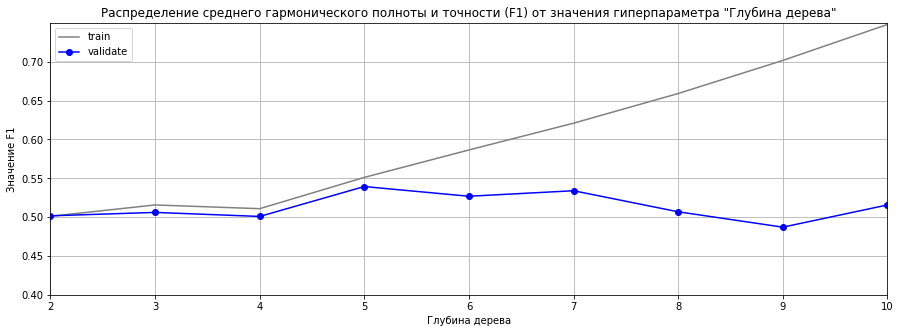

In [21]:
x = f1_tree['max_depth']
y = f1_tree['f1_train']
z = f1_tree['f1_valid']
plt.figure(figsize=(15,5))
plt.xlim(2,10)
plt.ylim(0.4,0.75)
plt.plot(x, y, color='grey', label = 'train')
plt.plot(x, z,  color = 'blue', label = 'validate',marker = "o")
plt.title('Распределение среднего гармонического полноты и точности (F1) от значения гиперпараметра "Глубина дерева"')
plt.xlabel('Глубина дерева')
plt.ylabel('Значение F1')
plt.yticks(np.arange(0.4, 0.75, 0.05))
plt.grid() 
plt.legend()
plt.show()

In [22]:
def auc_roc(choose_model, model_name):
    probabilities_valid = choose_model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid) 
    print('AUC-ROC модели', model_name, '=', auc_roc.round(4))

In [23]:
auc_roc(best_model_tree, 'Дерево решений')

AUC-ROC модели Дерево решений = 0.8253


**`Дерево решений DecisionTreeClassifier()`**  
Лучшая метрика модели **F1 = 0.5394**   
при гиперпаратемтре **Глубина дерева: 5**,   
**AUC-ROC =  0.8253**, что больше значения F1.

### Случайный лес ###

Подберём гиперпараметр max_depth, и грубо найдём наиболее перспективную область n_estimators.

In [24]:
best_model = None
best_result = 0 #0.59 не достигает
best_est = 0
best_depth = 0
for depth in range (1, 10):
    for est in range(1, 101, 10):
        model = RandomForestClassifier(random_state= 12345, n_estimators=est, max_depth = depth)
        model.fit(features_train, target_train) 
        predict_valid_forest = model.predict(features_valid) 
        result = f1_score(target_valid, predict_valid_forest)  
        if result > best_result:
            best_model = model
            best_result = result
            best_depth = depth
            best_est = est
        
print("F1 наилучшей модели на валидационной выборке:", best_result.round(4))
print("Количество деревьев:", best_est, "Максимальная глубина:", best_depth)

F1 наилучшей модели на валидационной выборке: 0.5719
Количество деревьев: 51 Максимальная глубина: 9


Глубину дерева max_depth определили, она равна 9.
Перспективную область n_estimators тоже определили. Возьмём диапозон n_estimators от 44 до 55.

In [25]:
train_forest = []
valid_forest = []
best_result_forest = 0 #0.59 не достигает
best_model_forest = None
best_depth = 9
best_est = 0

for est in range(44, 55):
    
    model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=best_depth)
    model_forest.fit(features_train, target_train)
    
    predict_train_forest = model_forest.predict(features_train)
    f1_train_forest = f1_score(target_train, predict_train_forest)
    train_forest.append(f1_train_forest.round(4))

    predict_valid_forest = model_forest.predict(features_valid) 
    f1_valid_forest = f1_score(target_valid, predict_valid_forest) 
    valid_forest.append(f1_valid_forest.round(4))
    
    if f1_valid_forest > best_result_forest:
        best_model_forest = model_forest
        best_result_forest = f1_valid_forest
        best_est = est

print("F1 наилучшей модели на валидационной выборке:", best_result_forest.round(4))
print("Количество деревьев:", best_est, ", Максимальная глубина дерева:", best_depth)
       
f1_forest = pd.DataFrame( [train_forest, valid_forest],columns = range(44,55)).T.reset_index() 
f1_forest.columns = ['n_estimators', 'f1_train', 'f1_valid']
f1_forest[['n_estimators','f1_valid']]

F1 наилучшей модели на валидационной выборке: 0.5719
Количество деревьев: 51 , Максимальная глубина дерева: 9


,n_estimators,f1_valid
0,44,0.5624
1,45,0.5639
2,46,0.5639
3,47,0.5714
4,48,0.5709
5,49,0.5709
6,50,0.5684
7,51,0.5719
8,52,0.5694
9,53,0.5719


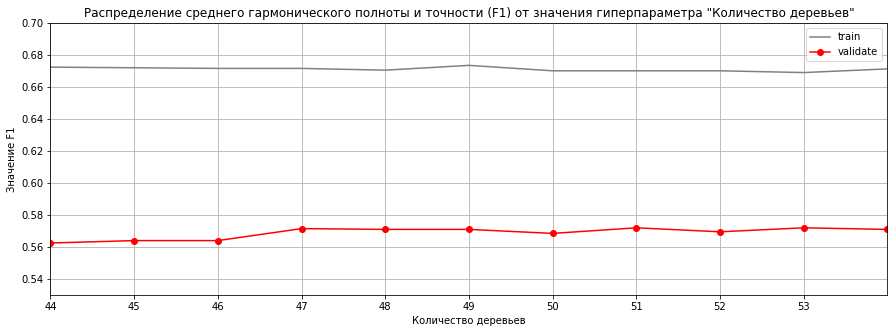

In [26]:
x = f1_forest['n_estimators']
y = f1_forest['f1_train']
z = f1_forest['f1_valid']
plt.figure(figsize=(15,5))
plt.xlim(44,54)
plt.ylim(0.53,0.7)
plt.plot(x, y, color='grey', label = 'train')
plt.plot(x, z,  color = 'red', label = 'validate', marker = "o")
plt.title('Распределение среднего гармонического полноты и точности (F1) от значения гиперпараметра "Количество деревьев"')
plt.xlabel('Количество деревьев')
plt.ylabel('Значение F1')
plt.xticks(np.arange(44, 54, 1))
plt.grid()
plt.legend()
plt.show()

In [27]:
auc_roc(best_model_forest, 'Случайный лес')

AUC-ROC модели Случайный лес = 0.8625


Модель **`Случайный лес  RandomForestClassifier()`**  
Лучшая метрика **F1 = 0.5719** при гиперпаратемтрах **Глубина дерева = 9** и **Количестве деревьев = 51**.    
**AUC-ROC = 0.8625**. F1 больше и AUC-ROC тоже больше.

### Логистическая регрессия

In [28]:
model_logregress = LogisticRegression(random_state=12345) 
model_logregress.fit(features_train, target_train)
predictions_valid_logregress = model_logregress.predict(features_valid) 
f1_valid_logregress = f1_score(target_valid, predictions_valid_logregress)
print('F1 модели на валидационной выборке =', f1_valid_logregress.round(4))

F1 модели на валидационной выборке = 0.3432


In [29]:
auc_roc(model_logregress, 'Логистическая регрессия')

AUC-ROC модели Логистическая регрессия = 0.7802


Модель **`Логистическая регрессия LogisticRegression()`**   
Метрика **F1 = 0.3432**  **AUC-ROC = 0.7802**.   
F1 меньше и AUC-ROC тоже меньше.

### Вывод

Обучили три модели классификации без учёта дисбаланса классов и получили их лучшие метрики  среднего гармонического полноты и точности (F1) и площади под ROC-кривой:

model                     | max_depth | n_estimator| F1      | AUC-ROC
:------------------------ |:---------:|:----------:|:-------:|:-------:
DecisionTreeClassifier()  | 5         | -          | 0.5394  | 0.8253
RandomForestClassifier()  | 9         | 51         | 0.5719  | 0.8625
LogisticRegression()      | -         | -          | 0.3432  | 0.7802

**Лучшая метрика F1 у модели "Случайный лес".** Но она ниже указанного значения 0.59.   
**Лучшее значение AUC-ROC тоже у этой модели.** Переходим к балансировке классов.

## Борьба с дисбалансом

По дисбалансу пройдемся 3мя методами по всем моделям для отбора лучшей метрики. 

### class_weight = 'balanced'

**Дерево решений** с подбором лучшего гиперпараметра Глубина дерева

In [30]:
train_tree_balanced = []
valid_tree_balanced = []
best_model_tree = None
best_result_tree = 0
best_depth = 0
for depth in range(1, 21):
    model_tree = DecisionTreeClassifier(class_weight='balanced', random_state=12345, max_depth=depth)
    model_tree.fit(features_train, target_train)
    
    predict_train_tree = model_tree.predict(features_train)
    f1_train_tree = f1_score(target_train, predict_train_tree) 
    train_tree_balanced.append(f1_train_tree.round(4))

    predicted_valid = model_tree.predict(features_valid)
    f1_valid_tree = f1_score(target_valid, predicted_valid) 
    valid_tree_balanced.append(f1_valid_tree.round(4))
    
    if f1_valid_tree > best_result_tree:
        best_model_tree = model_tree
        best_result_tree = f1_valid_tree
        best_depth = depth
          
print("F1 наилучшей модели на валидационной выборке:", best_result_tree.round(4))
print("Максимальная глубина дерева:", best_depth)

f1_tree_balanced = pd.DataFrame([train_tree_balanced,valid_tree_balanced], columns = range(1,21)).T.reset_index() 
f1_tree_balanced.columns = ['max_depth','f1_train','f1_valid']
f1_tree_balanced[['max_depth', 'f1_valid']].head(10)

F1 наилучшей модели на валидационной выборке: 0.5701
Максимальная глубина дерева: 8


,max_depth,f1_valid
0,1,0.4662
1,2,0.4871
2,3,0.4871
3,4,0.5458
4,5,0.5622
5,6,0.5662
6,7,0.5600
7,8,0.5701
8,9,0.5559
9,10,0.5255


In [31]:
auc_roc(best_model_tree, 'Дерево решений')

AUC-ROC модели Дерево решений = 0.8027


Модель **`Дерево решений DecisionTreeClassifier(class_weight = 'balanced')`**   
**F1 = 0.5701**  при **Глубине дерева = 8**  
**AUCK-ROC = 0.8027**. F1 выше и AUC-ROC выше.

**Случайный лес** с подбором гиперпараметров Глубина дерева и Количество деревьев. 

In [32]:
best_model = None
best_result = 0.59
best_est = 0
best_depth = 0
for depth in range (1, 10):
    for est in range(1, 101, 10):
        model = RandomForestClassifier(class_weight='balanced', random_state= 12345, 
                                       n_estimators=est, max_depth = depth)
        model.fit(features_train, target_train) 
        predict_valid_forest = model.predict(features_valid) 
        result = f1_score(target_valid, predict_valid_forest)
        
        if result > best_result:
            best_model = model
            best_result = result
            best_depth = depth
            best_est = est
        
print("F1 наилучшей модели на валидационной выборке:", best_result.round(4)) 
print("Количество деревьев:", best_est, ", Максимальная глубина:", best_depth)

F1 наилучшей модели на валидационной выборке: 0.6136
Количество деревьев: 51 , Максимальная глубина: 8


Глубину подобрали. Диапозон количества деревьев сузим и возьмем 46-56, чтобы подобрать точнее.

In [33]:
train_forest_balanced = []
valid_forest_balanced = []
best_result_forest = 0.59
best_model_forest = None
best_depth = 8
best_est = 0

for est in range(46, 56):
    
    model_forest = RandomForestClassifier(class_weight='balanced', random_state=12345, 
                                          n_estimators=est, max_depth=8)
    model_forest.fit(features_train, target_train)
    
    predict_train_forest = model_forest.predict(features_train)
    f1_train_forest = f1_score(target_train, predict_train_forest)
    train_forest_balanced.append(f1_train_forest.round(4))

    predict_valid_forest = model_forest.predict(features_valid)
    f1_valid_forest = f1_score(target_valid, predict_valid_forest) 
    valid_forest_balanced.append(f1_valid_forest.round(4))
    
    if f1_valid_forest > best_result_forest:
        best_model_forest = model_forest
        best_result_forest = f1_valid_forest
        best_est = est

print("F1 наилучшей модели на валидационной выборке:", best_result_forest.round(4))
print("Количество деревьев:", best_est,", Максимальная глубина дерева:", best_depth)

f1_forest_balanced = pd.DataFrame([train_forest_balanced,valid_forest_balanced], columns = range(46,56)).T.reset_index() 
f1_forest_balanced.columns = ['max_depth','f1_train','f1_valid']
f1_forest_balanced[['max_depth', 'f1_valid']]

F1 наилучшей модели на валидационной выборке: 0.6136
Количество деревьев: 51 , Максимальная глубина дерева: 8


,max_depth,f1_valid
0,46,0.6035
1,47,0.6038
2,48,0.6038
3,49,0.6053
4,50,0.6096
5,51,0.6136
6,52,0.6136
7,53,0.6119
8,54,0.6109
9,55,0.6073


In [34]:
auc_roc(best_model_forest, 'Случайный лес')

AUC-ROC модели Случайный лес = 0.8606


Модель **`Случайный лес  RandomForestClassifier(class_weight = 'balanced')`**   
**F1 = 0.6656** при  **Количестве деревьев = 20** и **Максимальнойая глубине дерева = 8**  
**AUCK-ROC = 0.8739**, что больше F1 

**Логистическая регрессия**

In [35]:
model_logregress = LogisticRegression(class_weight='balanced', random_state=12345) 
model_logregress.fit(features_train, target_train)
predictions_train_logregress = model_logregress.predict(features_train) 
predictions_valid_logregress = model_logregress.predict(features_valid) 
f1_valid_logregress = f1_score(target_valid, predictions_valid_logregress)
print('F1 модели на валидационной выборке = ', f1_valid_logregress.round(4))

F1 модели на валидационной выборке =  0.5


In [36]:
auc_roc(model_logregress, 'Логистическая регрессия')

AUC-ROC модели Логистическая регрессия = 0.7805


Модель **`Логистическая регрессия LogisticRegression(class_weight = 'balanced')`**   
**F1 = 0.5165**, **AUCK-ROC = 0.7947**. F1 меньше и AUC-ROC меньше. 

**Итог балансировки с использованием параметра class_weight = 'balanced'**

model                     | max_depth | n_estimator| F1      | AUC-ROC
:------------------------ |:---------:|:----------:|:-------:|: -------:
DecisionTreeClassifier()  | 8         | -          | 0.5701  | 0.8027
RandomForestClassifier()  | 8         | 51         | 0.6136  | 0.8606
LogisticRegression()      | -         | -          | 0.5000  | 0.7805

**Значение лучшей метрики F1 у модели "Случайный лес".** Она выше указанного значения 0.59.  
**Лучшее значение AUC-ROC тоже у этой модели.** 

### Upsample

Сбалансируем классы и увеличим в обучающей и валидационной выборках количество клиентов оттока (target==1)

In [37]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4)

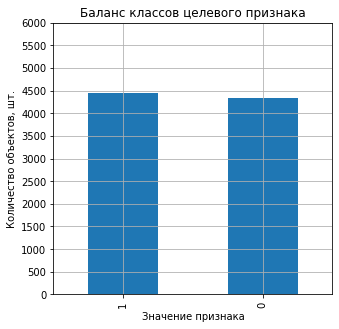

In [38]:
target_train_upsampled.value_counts().plot(kind='bar',grid=True,figsize=(5,5),
                           title='Баланс классов целевого признака')
plt.xlabel("Значение признака", fontsize=10)
plt.yticks(np.arange(0, 6500, 500), fontsize= 10 )
plt.ylabel("Количество объектов, шт.", fontsize=10)
plt.show()

**Дерево решений** с подбором лучшего гиперпараметра Глубина дерева

In [39]:
train_tree_upsampled = []
valid_tree_upsampled = []
best_model_tree = None
best_result_tree = 0
best_depth = 0

for depth in range(1, 21, 1):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features_train_upsampled, target_train_upsampled)
    
    predict_train_upsampled = model_tree.predict(features_train)
    f1_train_tree = f1_score(target_train, predict_train_upsampled)
    train_tree_upsampled.append(f1_train_tree.round(4))
    
    predicted_valid_upsampled = model_tree.predict(features_valid)
    f1_valid_tree = f1_score(target_valid, predicted_valid_upsampled) 
    valid_tree_upsampled.append(f1_valid_tree.round(4))
    
    if f1_valid_tree > best_result_tree:
        best_model_tree = model_tree
        best_result_tree = f1_valid_tree
        best_depth = depth
          
print("F1 наилучшей модели на валидационной выборке:", best_result_tree.round(4))
print("Максимальная глубина дерева:", best_depth)

f1_tree_upsampled = pd.DataFrame( [train_tree_upsampled, valid_tree_upsampled],columns = range(1,21)).T.reset_index() 
f1_tree_upsampled.columns = ['max_depth', 'f1_train', 'f1_valid']
f1_tree_upsampled[['max_depth','f1_valid']].head(10)

F1 наилучшей модели на валидационной выборке: 0.5714
Максимальная глубина дерева: 8


,max_depth,f1_valid
0,1,0.4662
1,2,0.4871
2,3,0.4871
3,4,0.5458
4,5,0.5622
5,6,0.5662
6,7,0.5606
7,8,0.5714
8,9,0.5579
9,10,0.5358


In [40]:
auc_roc(best_model_tree, 'Дерево решений')

AUC-ROC модели Дерево решений = 0.8052


Модель **`Дерево решений DecisionTreeClassifier() UPSAMPLE`**   
**F1 = 0.5714**  при **Глубине дерева = 8**  
**AUCK-ROC = 0.8052**. F1 больше и AUC-ROC больше.

**Случайный лес** с подбором гиперпараметров Глубина дерева и Количество деревьев. 

In [41]:
best_model = None
best_result = 0.59
best_est = 0
best_depth = 0
for depth in range (1, 21, 6):
    for est in range(1, 101, 10):
        model = RandomForestClassifier(random_state= 12345, 
                                       n_estimators=est, max_depth = depth)
        model.fit(features_train_upsampled, target_train_upsampled) 
        predict_valid_forest_upsampled = model.predict(features_valid) 
        result = f1_score(target_valid, predict_valid_forest_upsampled)  
        if result > best_result:
            best_model = model
            best_result = result
            best_depth = depth
            best_est = est
        
print("F1 наилучшей модели на валидационной выборке:", best_result.round(4)) 
print("Количество деревьев:", best_est, "Максимальная глубина:", best_depth)

F1 наилучшей модели на валидационной выборке: 0.6147
Количество деревьев: 81 Максимальная глубина: 13


Глубину подобрали. Диапозон количества деревьев сузим до 76-86, чтобы подобрать точнее.

In [42]:
train_forest_upsampled = []
valid_forest_upsampled = []
best_result_forest = 0.59
best_model_forest = None
best_depth = 13
best_est = 0

for est in range(73, 83):    
    model_forest = RandomForestClassifier(random_state=12345, 
                                          n_estimators=est, max_depth=best_depth)
    model_forest.fit(features_train_upsampled, target_train_upsampled)
    
    predict_train_forest = model_forest.predict(features_train)
    f1_train_forest = f1_score(target_train, predict_train_forest)
    train_forest_upsampled.append(f1_train_forest.round(4))

    predict_valid_forest = model_forest.predict(features_valid)
    f1_valid_forest = f1_score(target_valid, predict_valid_forest) 
    valid_forest_upsampled.append(f1_valid_forest.round(4))
    
    if f1_valid_forest > best_result_forest:
        best_model_forest = model_forest
        best_result_forest = f1_valid_forest
        best_est = est

print("F1 наилучшей модели на валидационной выборке:", best_result_forest.round(4))
print("Количество деревьев:", best_est)
print("Максимальная глубина дерева:", best_depth)

f1_forest_upsampled = pd.DataFrame([train_forest_upsampled, valid_forest_upsampled],
                                   columns = range(73, 83)).T.reset_index() 
f1_forest_upsampled.columns = ['n_estimators', 'f1_train', 'f1_valid']
f1_forest_upsampled[['n_estimators','f1_valid']]

F1 наилучшей модели на валидационной выборке: 0.6162
Количество деревьев: 76
Максимальная глубина дерева: 13


,n_estimators,f1_valid
0,73,0.6116
1,74,0.6124
2,75,0.6143
3,76,0.6162
4,77,0.6133
5,78,0.6162
6,79,0.6083
7,80,0.6139
8,81,0.6147
9,82,0.6147


In [43]:
auc_roc(best_model_forest, 'Случайный лес')

AUC-ROC модели Случайный лес = 0.8519


Модель **`Случайный лес RandomForestClassifier() UPSAMPLE`**   
**F1 = 0.6162**  при **Глубине дерева = 76**  
**AUCK-ROC = 0.8744**. F1 больше, а AUC-ROC меньше.   
Значит максимальная метрика F1 - не показктель высокого значения AUC-ROC.

**Логистическая регрессия**

In [44]:
model_logregress = LogisticRegression(random_state=12345) 
model_logregress.fit(features_train_upsampled, target_train_upsampled)
predictions_valid_logregress_upsampled = model_logregress.predict(features_valid) 
f1_valid_logregress = f1_score(target_valid, predictions_valid_logregress_upsampled)
print('F1 модели на валидационной выборке =', f1_valid_logregress.round(4))

F1 модели на валидационной выборке = 0.5


In [45]:
auc_roc(model_logregress, 'Логистическая регрессия')

AUC-ROC модели Логистическая регрессия = 0.7805


Модель **`Логистическая регрессия LogisticRegression() UPSAMPLE`**   
**F1 = 0.5**, **AUC-ROC = 0.7805**. F1 меньше и AUC-ROC меньше.

**Подводим итог метода UPSAMPLE**

model                     | max_depth | n_estimator| F1      | AUC-ROC
:------------------------ |:---------:|:----------:|:-------:|: -------:
DecisionTreeClassifier()  | 8         | -          | 0.5714  | 0.8052
RandomForestClassifier()  |13         | 76         | 0.6162  | 0.8519
LogisticRegression()      | -         | -          | 0.5000  | 0.7805  
  
**Значение лучшей метрики F1 у модели Случайный лес** И она выше указанного значения в 0.59.  
**Лучшее значение AUC-ROC тоже у этой модели.**

### Downsample

Сбалансируем классы и уменьшим в обучающей выборке количество клиентов оттока (target==0)

In [46]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones]) 
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones]) 
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, 
                                                       random_state=12345)
    return features_downsampled, target_downsampled

features_train_downsampled, target_train_downsampled = downsample(features_train, target_train, 0.25)

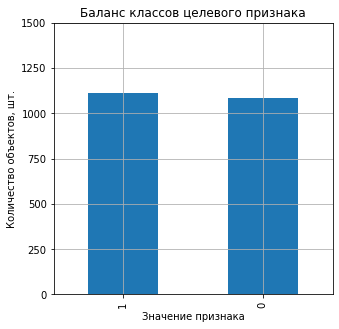

In [47]:
target_train_downsampled.value_counts().plot(kind='bar',grid=True,figsize=(5,5),
                           title='Баланс классов целевого признака')
plt.xlabel("Значение признака", fontsize=10)
plt.yticks(np.arange(0, 1700, 250), fontsize= 10 )
plt.ylabel("Количество объектов, шт.", fontsize=10)
plt.show()

**Дерево решений** с подбором лучшего гиперпараметра Глубина дерева

In [48]:
train_tree_downsampled = []
valid_tree_downsampled = []
best_model_tree = None
best_result_tree = 0
best_depth = 0

for depth in range(1, 21, 1):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features_train_downsampled, target_train_downsampled)
    
    predict_train_tree_downsampled = model_tree.predict(features_train)
    f1_train_tree = f1_score(target_train, predict_train_tree_downsampled)
    train_tree_downsampled.append(f1_train_tree.round(4))
    
    predicted_valid_downsampled = model_tree.predict(features_valid)
    f1_valid_tree = f1_score(target_valid, predicted_valid_downsampled) 
    valid_tree_downsampled.append(f1_valid_tree.round(4))
    
    if f1_valid_tree > best_result_tree:
        best_model_tree = model_tree
        best_result_tree = f1_valid_tree
        best_depth = depth
          
print("F1 наилучшей модели на валидационной выборке:", best_result_tree.round(4))
print("Максимальная глубина дерева:", best_depth)

f1_tree_downsampled = pd.DataFrame( [train_tree_downsampled, valid_tree_downsampled],
                                   columns = range(1,21)).T.reset_index() 
f1_tree_downsampled.columns = ['max_depth', 'f1_train', 'f1_valid']
f1_tree_downsampled[['max_depth','f1_valid']].head(10)

F1 наилучшей модели на валидационной выборке: 0.5576
Максимальная глубина дерева: 6


,max_depth,f1_valid
0,1,0.4662
1,2,0.4871
2,3,0.4871
3,4,0.5472
4,5,0.5537
5,6,0.5576
6,7,0.5491
7,8,0.5322
8,9,0.5226
9,10,0.5145


In [49]:
auc_roc(best_model_tree, 'Дерево решений')

AUC-ROC модели Дерево решений = 0.8265


Модель **`Дерево решений DecisionTreeClassifier DOWNSAMPLE `**   
**F1 = 0.6107**  при **Глубине дерева = 6** , **AUC-ROC = 0.7145**.  
F1 больше и AUC-ROC больше.

**Случайный лес** с подбором гиперпараметров Глубина дерева и Количество деревьев.

In [50]:
best_model = None
best_result = 0.59
best_est = 0
best_depth = 0
for depth in range (1, 21):
    for est in range(1,101,10):
        model = RandomForestClassifier(random_state= 12345, 
                                       n_estimators=est, max_depth = depth)
        model.fit(features_train_downsampled, target_train_downsampled) 
        predict_valid_forest = model.predict(features_valid) 
        result = f1_score(target_valid, predict_valid_forest)  
        if result > best_result:
            best_model = model
            best_result = result
            best_depth = depth
            best_est = est
        
print("F1 наилучшей модели на валидационной выборке:", best_result.round(4)) 
print("Количество деревьев:", best_est, ", Максимальная глубина:", best_depth)

F1 наилучшей модели на валидационной выборке: 0.6046
Количество деревьев: 71 , Максимальная глубина: 10


Глубину подобрали. Диапозон количества деревьев сузим и возьмем 63-73, чтобы подобрать точнее.

In [56]:
train_forest_downsampled = []
valid_forest_downsampled = []
best_result_forest = 0.59
best_model_forest = None
best_depth = 10
best_est = 0

for est in range(63, 73):
    
    model_forest = RandomForestClassifier(random_state=12345, 
                                          n_estimators=est, max_depth=best_depth)
    model_forest.fit(features_train_downsampled, target_train_downsampled)
    
    predict_train_forest = model_forest.predict(features_train)
    f1_train_forest = f1_score(target_train, predict_train_forest)
    train_forest_downsampled.append(f1_train_forest.round(4))

    predict_valid_forest = model_forest.predict(features_valid)
    f1_valid_forest = f1_score(target_valid, predict_valid_forest) 
    valid_forest_downsampled.append(f1_valid_forest.round(4))
    
    if f1_valid_forest > best_result_forest:
        best_model_forest = model_forest
        best_result_forest = f1_valid_forest
        best_est = est

print("F1 наилучшей модели на валидационной выборке:", best_result_forest.round(4))
print("Количество деревьев:", best_est)
print("Максимальная глубина дерева:", best_depth)

f1_forest_downsampled = pd.DataFrame([train_forest_downsampled, valid_forest_downsampled],
                                     columns = range(63, 73)).T.reset_index()
f1_forest_downsampled.columns = ['n_estimators', 'f1_train', 'f1_valid']
f1_forest_downsampled[['n_estimators','f1_valid']]

F1 наилучшей модели на валидационной выборке: 0.6074
Количество деревьев: 66
Максимальная глубина дерева: 10


,n_estimators,f1_valid
0,63,0.6002
1,64,0.6037
2,65,0.6009
3,66,0.6074
4,67,0.6002
5,68,0.6037
6,69,0.6017
7,70,0.5998
8,71,0.6046
9,72,0.5985


In [57]:
auc_roc(best_model_forest, 'Случайный лес')

AUC-ROC модели Случайный лес = 0.8629


Модель **`Случайный лес  RandomForestClassifier DOWNSAMPLE`**   
**F1 = 0.6349** при  **Количестве деревьев = *24* и **Максимальнойая глубине дерева = 8**  
**AUC-ROC = 0.8758**. F1 больше и AUC-ROC больше, причём последнее самое большое из всех.


**Логистическая регрессия**

In [58]:
model_logregress = LogisticRegression(random_state=12345) 
model_logregress.fit(features_train_downsampled, target_train_downsampled)
predictions_valid_logregress = model_logregress.predict(features_valid) 
f1_valid_logregress = f1_score(target_valid, predictions_valid_logregress)
print('F1 модели на валидационной выборке =', f1_valid_logregress.round(4))

F1 модели на валидационной выборке = 0.5005


In [59]:
auc_roc(model_logregress, 'Логистическая регрессия')

AUC-ROC модели Логистическая регрессия = 0.7811


Модель **`Логистическая регрессия LogisticRegression() DOWNSAMPLE`**   
**F1 = 0.5169**, **AUC-ROC = 0.7948**. F1 меньше и AUC-ROC меньше.

**Подводим итог метода DOWNSAMPLE**

model                     | max_depth | n_estimator| F1      | AUC-ROC
:------------------------ |:---------:|:----------:|:-------:|: -------:
DecisionTreeClassifier()  | 6         | -          | 0.5576  | 0.8027
RandomForestClassifier()  | 10        | 66         | 0.6074  | 0.8606
LogisticRegression()      | -         | -          | 0.5005  | 0.7811

Значение лучшей метрики F1 у модели Случайный лес, у неё же лучшая метрика AUC-ROC**

### Вывод

Проверили 3 метода балансировки классов для всех основных моделей.   

Для теста выбираем модель с балансировкой веса классов.   
**"`Случайный лес`"** с параметром **class_weight = 'balanced'** и гиперпараметрами **max_depth = 8**, **n_estimators = 51**. 
У неё обе метрики на подходящем уровне и в балансе, F1 больше обозначенных в задании 0.59, а уровень AUC-ROC стремится к максимальному из всех моделей.   
Поэтому данную модель выбираем для тестирования.  

## Тестирование модели

Объединим обучающую и валидационную выборки в одну большую обучающую, чтобы не терять 15% данных.

In [61]:
features_train_big = pd.concat([features_train,features_valid])
target_train_big = pd.concat([target_train, target_valid]) 
percent_ratio(features_train_big,'features_train_big')

Процентое соотношение features_train_big от исходных данных: 80.0 %


Все выборки были уже масштабированы, поэтому здесь манипуляций не производим.   


Применим метод балансировки классов `class_weight = 'balanced'`, показавший подходящие  метрикуи и прогоняем лучшую модель `RandomForestClassifier()` с этим методом в параметре на тестовой выборке.

In [62]:
model = RandomForestClassifier(class_weight='balanced', random_state= 12345, 
                                       n_estimators=51, max_depth =8)
model.fit(features_train_big, target_train_big) 
predict_test_forest = model.predict(features_test) 
result = f1_score(target_test, predict_test_forest)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test) 
print("F1 модели на тестовой выборке:", result.round(4)) 
print('AUC-ROC модели', auc_roc.round(4))

F1 модели на тестовой выборке: 0.6196
AUC-ROC модели 0.8706


### Вывод

Исследовали подходящую модель на тестовой выборке.  
Метрика **F1** выше значения, поставленного в задаче в 0.59 и составляет **0.6196**  
**AUC-ROC** составляет **0.8706**. Считаем, что с поставленной задачей справились!



## Общий вывод

Исходный массив данных, описывающий состояние и поведениех клентов банка предобработали, заполнив пропуски, и убрав некоторые незначительные для моделей классификации признаки.
Преобразовали категориальные признаки в численные и масштабировали признаки с помощью стандартизации данных, чтобы модели равнозначно учитывали все признаки.
Извлекли целевой признак, определяющий уйдет клиент или останется, и признаки на основе которых делаем прогноз останется ли клиент с банком или уйдет.  
Проверили признаки на корреляцию, чтобы не перегружать перпективные модели.
Разделили данные на 3 выборки в пропорции 60:20:20, на которых обучаем, проверяем и тестируем перспективные модели оттока клиентов. Выявили дисбаланс целевого признака в  исходящем массиве, который учитываем в дальнейшем при работе с моделями.
Исследовали три модели классификации на несбалансированных данных и 3х методах балансировки. Получили лучшие метрики качества для определения останется клиент с банком или уйдет.   
Самой подходящей из всех 12 исследуемых моделей  выбрали Случайный лес (RandomForestClassifier) с гиперпараметрами глубина дерева (max_depth) = 8 и количеством деревьев (n_estimators) = 51  с методом балансировки классов, используя параметр модели class_weight = 'balanced'. У неё не самые высокие значения F1 и AUC-ROC, вторые в обеих метриках, при этом самые стабильные (не граничащие с критическими значениями)  
Протестировали выбранную модель на тестовой выборке, предварительно обучив на большой объединённой обучающей и валидационной выборке, и получили качество прогноза положительного класса  F1 = 0.6196, что на 5% выше обозначенного допустимого порогового значения.  
Функционал качества модели AUC-ROC получился 0.8706.